In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
num_data = pd.read_csv('/content/rmpCapstoneNum.csv')
qual_data = pd.read_csv('/content/rmpCapstoneQual.csv')
tags_data = pd.read_csv('/content/rmpCapstoneTags.csv')
num_data.head()

,5,1.5,2,0,NaN,0.1,0.2,1
0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,3.2,3.0,4.0,0.0,NaN,0.0,1,0
2,3.6,3.5,10.0,1.0,NaN,0.0,0,0
3,1.0,5.0,1.0,0.0,NaN,0.0,0,0
4,3.5,3.3,22.0,0.0,56.0,7.0,1,0


In [3]:
# Renaming columns for each dataset based on provided descriptions

# rmpCapstoneNum.csv
num_data.columns = [
    'Average Rating',  # Column 1
    'Average Difficulty',  # Column 2
    'Number of Ratings',  # Column 3
    'Received Pepper',  # Column 4
    'Proportion Retake',  # Column 5
    'Ratings Online',  # Column 6
    'Male Gender',  # Column 7
    'Female Gender'  # Column 8
]

# rmpCapstoneQual.csv
qual_data.columns = [
    'Major/Field',  # Column 1
    'University',  # Column 2
    'US State'  # Column 3
]

# rmpCapstoneTags.csv
tags_data.columns = [
    'Tough Grader', 'Good Feedback', 'Respected', 'Lots to Read',
    'Participation Matters', 'Don’t Skip Class', 'Lots of Homework',
    'Inspirational', 'Pop Quizzes!', 'Accessible', 'So Many Papers',
    'Clear Grading', 'Hilarious', 'Test Heavy', 'Graded by Few Things',
    'Amazing Lectures', 'Caring', 'Extra Credit', 'Group Projects',
    'Lecture Heavy'
]

# Display the updated columns for verification
num_data.columns, qual_data.columns, tags_data.columns


(Index(['Average Rating', 'Average Difficulty', 'Number of Ratings',
        'Received Pepper', 'Proportion Retake', 'Ratings Online', 'Male Gender',
        'Female Gender'],
       dtype='object'),
 Index(['Major/Field', 'University', 'US State'], dtype='object'),
 Index(['Tough Grader', 'Good Feedback', 'Respected', 'Lots to Read',
        'Participation Matters', 'Don’t Skip Class', 'Lots of Homework',
        'Inspirational', 'Pop Quizzes!', 'Accessible', 'So Many Papers',
        'Clear Grading', 'Hilarious', 'Test Heavy', 'Graded by Few Things',
        'Amazing Lectures', 'Caring', 'Extra Credit', 'Group Projects',
        'Lecture Heavy'],
       dtype='object'))

#solution for 2

In [11]:
from scipy.stats import levene
# Reloading numerical dataset for problem 7
num_data_path = '/content/rmpCapstoneNum.csv'
num_data = pd.read_csv(num_data_path)

# Renaming columns
num_data.columns = [
    'Average Rating', 'Average Difficulty', 'Number of Ratings',
    'Received Pepper', 'Proportion Retake', 'Ratings Online',
    'Male Gender', 'Female Gender'
]

# Step 1: Calculate the mean of 'Number of Ratings'
mean_num_ratings = num_data['Number of Ratings'].mean()

# Step 2: Drop rows where 'Number of Ratings' is less than the mean
num_data_filtered = num_data[num_data['Number of Ratings'] >= mean_num_ratings]
ratings_cleaned = num_data_filtered.dropna(subset=['Average Rating', 'Male Gender', 'Female Gender'])

# Step 2: Separate ratings by gender
male_ratings = ratings_cleaned['Average Rating'][ratings_cleaned['Male Gender'] == 1]
female_ratings = ratings_cleaned['Average Rating'][ratings_cleaned['Female Gender'] == 1]

# Step 3: Calculate variance for each group
male_variance = np.var(male_ratings, ddof=1)  # Sample variance
female_variance = np.var(female_ratings, ddof=1)

# Step 4: Perform Levene's test for equality of variances
stat, p_value = levene(male_ratings, female_ratings)

# Step 5: Output results
print("Male Variance:", male_variance)
print("Female Variance:", female_variance)
print("Levene's Test Statistic:", stat)
print("p-value:", p_value)

# Step 6: Interpret results
if p_value < 0.05:
    print("The variances are significantly different (p < 0.05).")
else:
    print("The variances are not significantly different (p >= 0.05).")


Male Variance: 0.8010719198959755
Female Variance: 0.8647111378670566
Levene's Test Statistic: 14.457198246146726
p-value: 0.00014390764503900526
The variances are significantly different (p < 0.05).


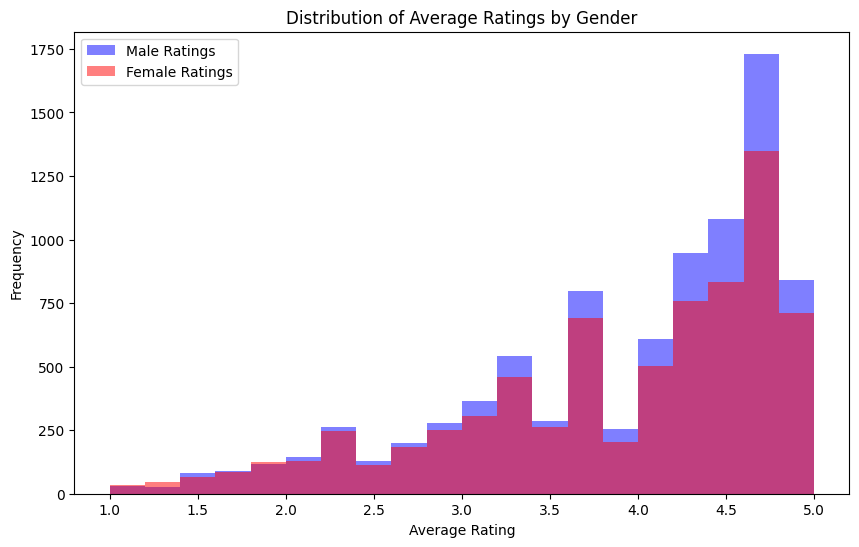

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(male_ratings, bins=20, alpha=0.5, label='Male Ratings', color='blue')
plt.hist(female_ratings, bins=20, alpha=0.5, label='Female Ratings', color='red')
plt.title('Distribution of Average Ratings by Gender')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#solution for 3

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import levene

# Load the dataset
num_data_path = '/content/rmpCapstoneNum.csv'
num_data = pd.read_csv(num_data_path)

# Renaming columns for clarity
num_data.columns = [
    'Average Rating', 'Average Difficulty', 'Number of Ratings',
    'Received Pepper', 'Proportion Retake', 'Ratings Online',
    'Male Gender', 'Female Gender'
]

# Step 1: Drop rows where the target ('Average Rating') is missing
num_data_cleaned = num_data.dropna(subset=['Average Rating'])

# Step 2: Filter rows where 'Number of Ratings' is below the mean
mean_num_ratings = num_data_cleaned['Number of Ratings'].mean()
num_data_filtered = num_data_cleaned[num_data_cleaned['Number of Ratings'] >= mean_num_ratings]

# Step 3: Drop rows with missing values in predictor variables used for gender analysis
ratings_cleaned = num_data_filtered.dropna(subset=['Male Gender', 'Female Gender'])

# Step 4: Separate ratings by gender for analysis
male_ratings = ratings_cleaned['Average Rating'][ratings_cleaned['Male Gender'] == 1]
female_ratings = ratings_cleaned['Average Rating'][ratings_cleaned['Female Gender'] == 1]

# Output cleaned data statistics
print(f"Total rows after cleaning: {ratings_cleaned.shape[0]}")
print(f"Male ratings count: {male_ratings.shape[0]}")
print(f"Female ratings count: {female_ratings.shape[0]}")


Total rows after cleaning: 20577
Male ratings count: 8814
Female ratings count: 7354


In [15]:


# Bootstrap parameters
n_bootstrap = 10000  # Number of bootstrap samples

# Arrays to store bootstrap statistics
mean_differences = []
variance_differences = []
cohens_d_values = []

# Original statistics
original_male_ratings = male_ratings.values
original_female_ratings = female_ratings.values

for _ in range(n_bootstrap):
    # Resample with replacement
    male_sample = np.random.choice(original_male_ratings, size=len(original_male_ratings), replace=True)
    female_sample = np.random.choice(original_female_ratings, size=len(original_female_ratings), replace=True)

    # Mean difference
    mean_differences.append(np.mean(male_sample) - np.mean(female_sample))

    # Variance difference
    variance_differences.append(np.var(male_sample, ddof=1) - np.var(female_sample, ddof=1))

    # Cohen's d
    pooled_std = np.sqrt(((len(male_sample) - 1) * np.var(male_sample, ddof=1) +
                          (len(female_sample) - 1) * np.var(female_sample, ddof=1)) /
                          (len(male_sample) + len(female_sample) - 2))
    cohens_d_values.append((np.mean(male_sample) - np.mean(female_sample)) / pooled_std)

# Confidence intervals
mean_diff_ci = np.percentile(mean_differences, [2.5, 97.5])
variance_diff_ci = np.percentile(variance_differences, [2.5, 97.5])
cohens_d_ci = np.percentile(cohens_d_values, [2.5, 97.5])

# Output results
print(f"Mean Difference CI: {mean_diff_ci}")
print(f"Variance Difference CI: {variance_diff_ci}")
print(f"Cohen's d CI: {cohens_d_ci}")


Mean Difference CI: [0.02580255 0.08231028]
Variance Difference CI: [-0.10171693 -0.02477299]
Cohen's d CI: [0.02828897 0.09032877]


#solution for 5

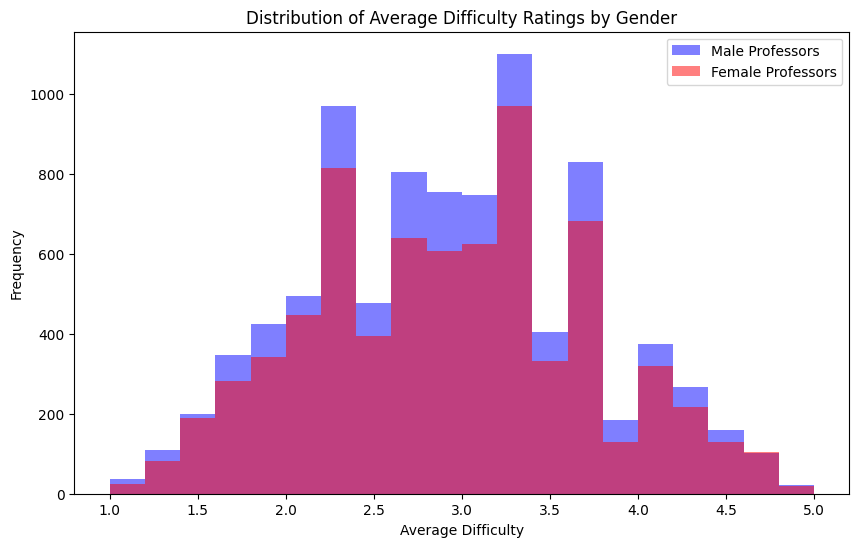

male_mean:  2.905162241887906
female_mean:  2.905792765841719
male_std:  0.7920207872193589
female_std:  0.7939337953421229
t_stat:  -0.050336857462557685
p_value:  0.95985459586226


In [4]:
# Step 1: Calculate the mean of 'Number of Ratings'
mean_num_ratings = num_data['Number of Ratings'].mean()

# Step 2: Drop rows where 'Number of Ratings' is less than the mean
num_data_filtered = num_data[num_data['Number of Ratings'] >= mean_num_ratings]

# Step 3: Remove rows with missing values in relevant columns ('Average Difficulty', 'Male Gender', 'Female Gender')
num_data_cleaned = num_data_filtered.dropna(subset=['Average Difficulty', 'Male Gender', 'Female Gender'])
# Extracting relevant columns
difficulty = num_data_cleaned['Average Difficulty']
male_gender = num_data_cleaned['Male Gender']
female_gender = num_data_cleaned['Female Gender']

# Splitting data by gender
male_difficulty = difficulty[male_gender == 1]
female_difficulty = difficulty[female_gender == 1]

# Performing t-test to check for significant difference
t_stat, p_value = ttest_ind(male_difficulty, female_difficulty, equal_var=False)

# Summary statistics
male_mean = np.mean(male_difficulty)
female_mean = np.mean(female_difficulty)
male_std = np.std(male_difficulty)
female_std = np.std(female_difficulty)

# Plotting distributions
plt.figure(figsize=(10, 6))
plt.hist(male_difficulty, bins=20, alpha=0.5, label='Male Professors', color='blue')
plt.hist(female_difficulty, bins=20, alpha=0.5, label='Female Professors', color='red')
plt.title('Distribution of Average Difficulty Ratings by Gender')
plt.xlabel('Average Difficulty')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("male_mean: ", male_mean)
print("female_mean: ",female_mean)
print("male_std: ", male_std)
print("female_std: ", female_std)
print("t_stat: ", t_stat)
print("p_value: ", p_value)

#solution for 6

In [5]:
from scipy.stats import norm
import numpy as np

# Step 1: Calculate the mean of 'Number of Ratings'
mean_num_ratings = num_data['Number of Ratings'].mean()

# Step 2: Drop rows where 'Number of Ratings' is less than the mean
num_data_filtered = num_data[num_data['Number of Ratings'] >= mean_num_ratings]

# Step 3: Clean data by dropping rows with NaN in relevant columns
ratings_cleaned = num_data_filtered.dropna(subset=['Average Rating', 'Male Gender', 'Female Gender'])

# Step 4: Split data by gender
average_rating = ratings_cleaned['Average Rating']
male_ratings = average_rating[ratings_cleaned['Male Gender'] == 1]
female_ratings = average_rating[ratings_cleaned['Female Gender'] == 1]

# Step 5: Calculate means and standard deviations
male_mean_rating = np.mean(male_ratings)
female_mean_rating = np.mean(female_ratings)
mean_difference = male_mean_rating - female_mean_rating

male_std_rating = np.std(male_ratings, ddof=1)
female_std_rating = np.std(female_ratings, ddof=1)
n_male = len(male_ratings)
n_female = len(female_ratings)

# Step 6: Calculate pooled standard deviation
pooled_std = np.sqrt(
    ((n_male - 1) * male_std_rating**2 + (n_female - 1) * female_std_rating**2) / (n_male + n_female - 2)
)

# Step 7: Calculate Cohen's d
cohens_d = mean_difference / pooled_std

# Step 8: Calculate standard error of Cohen's d
se_d = np.sqrt((n_male + n_female) / (n_male * n_female) + cohens_d**2 / (2 * (n_male + n_female)))

# Step 9: Calculate 95% confidence interval for Cohen's d
z_critical = norm.ppf(0.975)  # 95% confidence
ci_lower = cohens_d - z_critical * se_d
ci_upper = cohens_d + z_critical * se_d

# Output results
print("Male Mean Rating:", male_mean_rating)
print("Female Mean Rating:", female_mean_rating)
print("Mean Difference:", mean_difference)
print("Pooled Standard Deviation:", pooled_std)
print("Cohen's d:", cohens_d)
print("Standard Error of Cohen's d:", se_d)
print("95% Confidence Interval for Cohen's d: [{}, {}]".format(ci_lower, ci_upper))




Male Mean Rating: 3.9261629226230994
Female Mean Rating: 3.8721376121838453
Mean Difference: 0.05402531043925407
Pooled Standard Deviation: 0.9110531293248139
Cohen's d: 0.05929984618931335
Standard Error of Cohen's d: 0.01579699440961932
95% Confidence Interval for Cohen's d: [0.028338306082478913, 0.0902613862961478]


#solutiion for 7

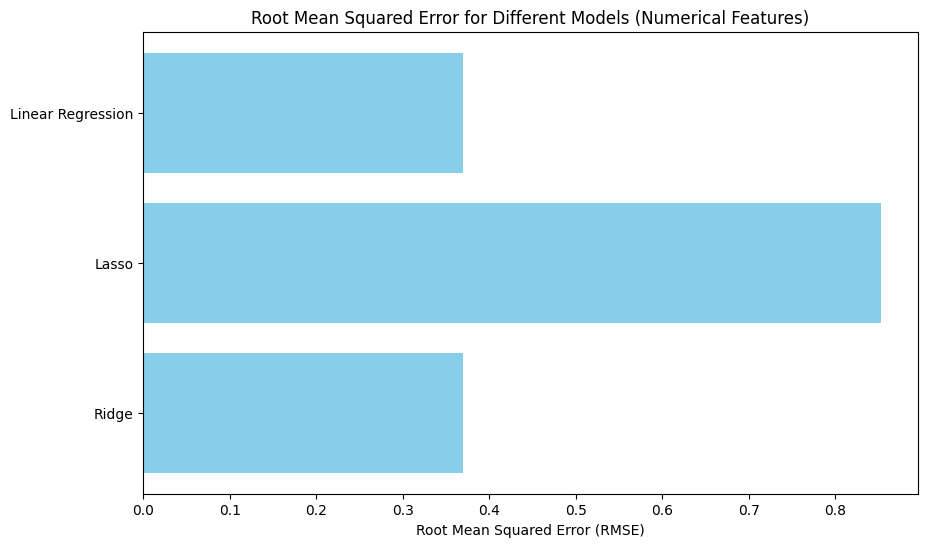

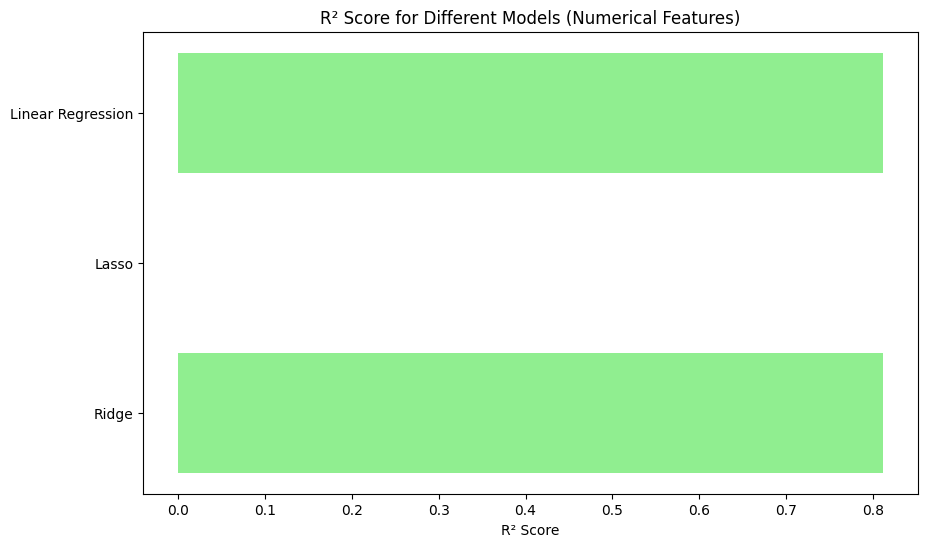

{'Linear Regression': {'RMSE': 0.3701037193081877,
  'R² Score': 0.8116860445983671},
 'Lasso': {'RMSE': 0.8528932609493783, 'R² Score': -5.750247628011351e-05},
 'Ridge': {'RMSE': 0.37010437757374337, 'R² Score': 0.811685374728305}}

In [6]:
# Re-importing libraries after the environment reset
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Reloading numerical dataset for problem 7
num_data_path = '/content/rmpCapstoneNum.csv'
num_data = pd.read_csv(num_data_path)

# Renaming columns
num_data.columns = [
    'Average Rating', 'Average Difficulty', 'Number of Ratings',
    'Received Pepper', 'Proportion Retake', 'Ratings Online',
    'Male Gender', 'Female Gender'
]

# Step 1: Calculate the mean of 'Number of Ratings'
mean_num_ratings = num_data['Number of Ratings'].mean()

# Step 2: Drop rows where 'Number of Ratings' is less than the mean
num_data_filtered = num_data[num_data['Number of Ratings'] >= mean_num_ratings]
num_data_cleaned = num_data_filtered.dropna()
# Preparing numerical features (X) and target (y)
X_num = num_data_cleaned[['Average Difficulty', 'Number of Ratings', 'Received Pepper',
                          'Proportion Retake', 'Ratings Online', 'Male Gender', 'Female Gender']]
y_num = num_data_cleaned['Average Rating']

# Standardizing the features for models that are sensitive to scaling
scaler = StandardScaler()
X_scaled_num = scaler.fit_transform(X_num)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_num, y_num, test_size=0.2, random_state=42)



# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    "Ridge": Ridge()
}

# Step 3: Fit and evaluate each model
evaluation_results_num = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store the evaluation metrics
    evaluation_results_num[model_name] = {
        'RMSE': rmse,
        'R² Score': r2
    }

# Extracting the model names and their evaluation metrics for plotting
model_names_num = list(evaluation_results_num.keys())
mse_values_num = [evaluation_results_num[model]['RMSE'] for model in model_names_num]
r2_values_num = [evaluation_results_num[model]['R² Score'] for model in model_names_num]

# Plotting RMSE for each model
plt.figure(figsize=(10, 6))
plt.barh(model_names_num, mse_values_num, color='skyblue')
plt.xlabel("Root Mean Squared Error (RMSE)")
plt.title("Root Mean Squared Error for Different Models (Numerical Features)")
plt.gca().invert_yaxis()  # Invert the axis to have the best performer on top
plt.show()

# Plotting R² Score for each model
plt.figure(figsize=(10, 6))
plt.barh(model_names_num, r2_values_num, color='lightgreen')
plt.xlabel("R² Score")
plt.title("R² Score for Different Models (Numerical Features)")
plt.gca().invert_yaxis()  # Invert the axis to have the best performer on top
plt.show()

evaluation_results_num



Top features:
              Feature  Importance
3   Proportion Retake    0.616143
0  Average Difficulty    0.150679
2     Received Pepper    0.099554
5         Male Gender    0.025755
6       Female Gender    0.013881
1   Number of Ratings    0.002435
4      Ratings Online    0.000333


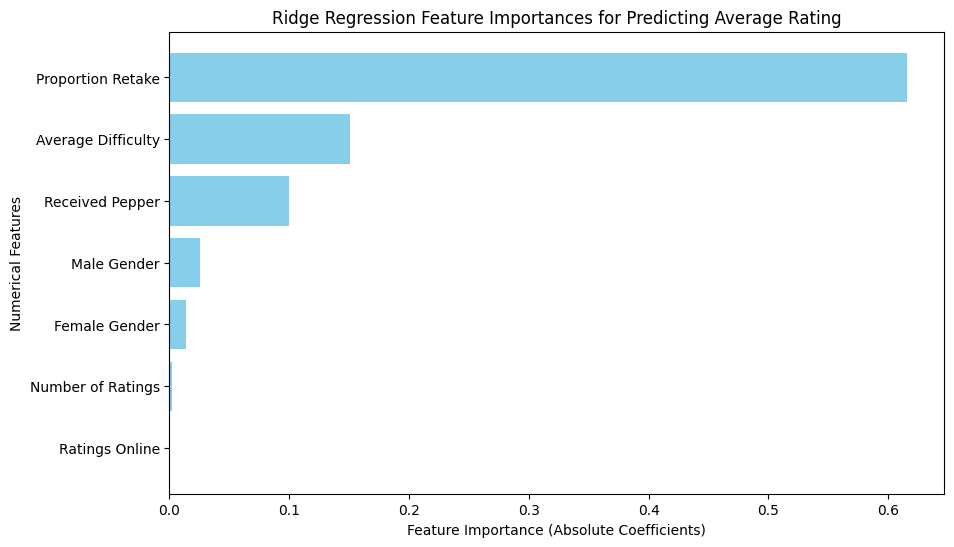

In [7]:
# Train the Ridge Regression model explicitly
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Extract coefficients (acts as feature importance in Ridge regression)
coefficients = ridge_model.coef_

# Map coefficients to feature names
importance_df = pd.DataFrame({
    'Feature': X_num.columns,  # Use the feature names
    'Importance': np.abs(coefficients)  # Absolute value of coefficients
}).sort_values(by='Importance', ascending=False)

# Display the most important features
print("Top features:")
print(importance_df)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance (Absolute Coefficients)')
plt.ylabel('Numerical Features')
plt.title('Ridge Regression Feature Importances for Predicting Average Rating')
plt.gca().invert_yaxis()  # Best predictors on top
plt.show()

#SOLUTION FOR 8

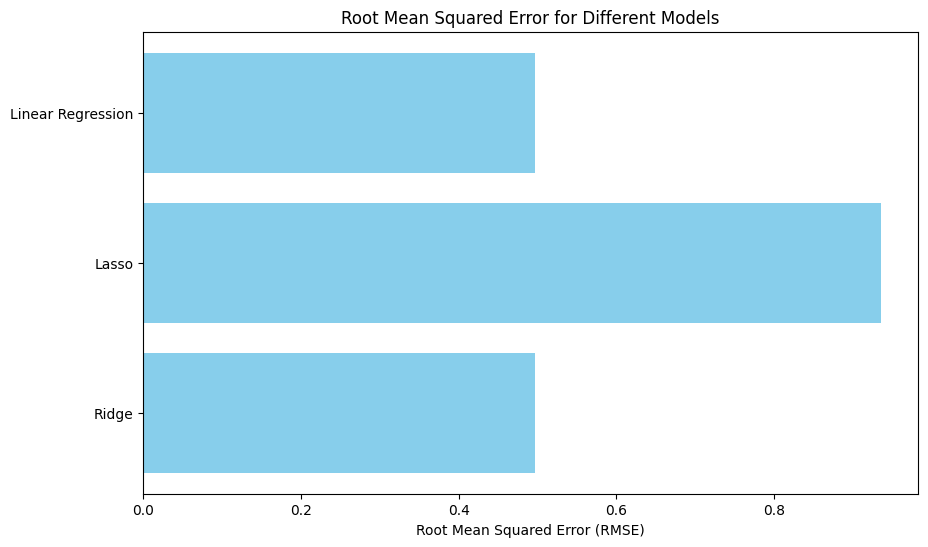

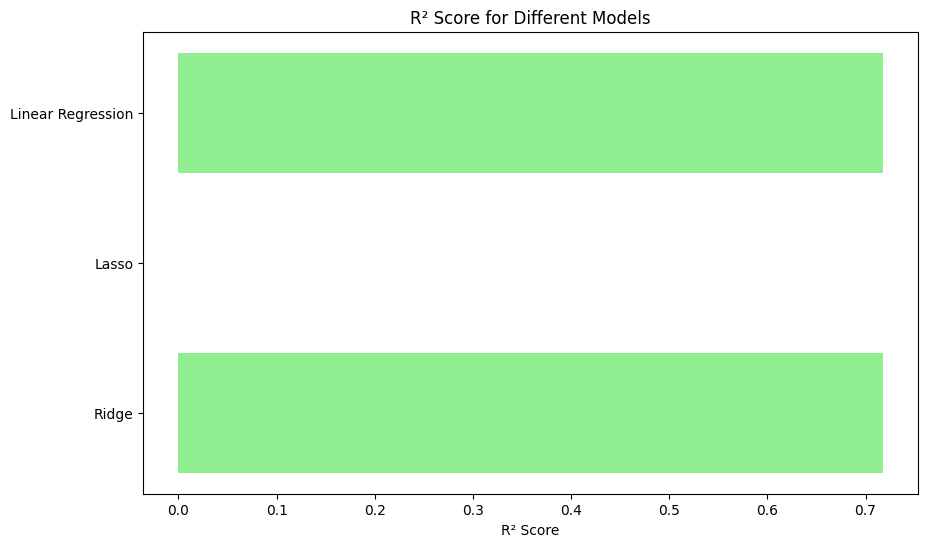

{'Linear Regression': {'RMSE': 0.4970599406529841,
  'R² Score': 0.7176731495411122},
 'Lasso': {'RMSE': 0.9355508376853925, 'R² Score': -0.0001599042932640682},
 'Ridge': {'RMSE': 0.49705584679144227, 'R² Score': 0.7176778000960296}}

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import pandas as pd

# Loading tags and numerical datasets
tags_data_path = '/content/rmpCapstoneTags.csv'
num_data_path = '/content/rmpCapstoneNum.csv'

tags_data = pd.read_csv(tags_data_path)
num_data = pd.read_csv(num_data_path)

num_data.columns = [
    'Average Rating', 'Average Difficulty', 'Number of Ratings',
    'Received Pepper', 'Proportion Retake', 'Ratings Online',
    'Male Gender', 'Female Gender'
]

tags_data.columns = [
    'Tough Grader', 'Good Feedback', 'Respected', 'Lots to Read',
    'Participation Matters', 'Don’t Skip Class', 'Lots of Homework',
    'Inspirational', 'Pop Quizzes!', 'Accessible', 'So Many Papers',
    'Clear Grading', 'Hilarious', 'Test Heavy', 'Graded by Few Things',
    'Amazing Lectures', 'Caring', 'Extra Credit', 'Group Projects',
    'Lecture Heavy'
]

# Step 1: Merge the datasets
combined_data = pd.concat([num_data[['Average Rating', 'Number of Ratings']], tags_data], axis=1)

# Step 2: Calculate the mean of 'Number of Ratings' and filter rows
mean_num_ratings = combined_data['Number of Ratings'].mean()
combined_data = combined_data[combined_data['Number of Ratings'] >= mean_num_ratings]

# Step 3: Drop rows with any NaN values
combined_data = combined_data.dropna()

# Step 4: Normalize tags by the number of ratings
for col in tags_data.columns:
    combined_data[col] = combined_data[col] / combined_data['Number of Ratings']

# Preparing features and target
X_tags = combined_data.iloc[:, 2:]  # All normalized tag columns as features
y_tags = combined_data['Average Rating']  # Average Rating as the target
scaler = StandardScaler()
X_scaled_tags = scaler.fit_transform(X_tags)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_tags, y_tags, test_size=0.2, random_state=42)



# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    "Ridge": Ridge()
}

# Step 3: Fit and evaluate each model
evaluation_results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store the evaluation metrics
    evaluation_results[model_name] = {
        'RMSE': rmse,
        'R² Score': r2
    }

# Extracting the model names and their evaluation metrics for plotting
model_names = list(evaluation_results.keys())
mse_values = [evaluation_results[model]['RMSE'] for model in model_names]
r2_values = [evaluation_results[model]['R² Score'] for model in model_names]

# Plotting MSE for each model
plt.figure(figsize=(10, 6))
plt.barh(model_names, mse_values, color='skyblue')
plt.xlabel("Root Mean Squared Error (RMSE)")
plt.title("Root Mean Squared Error for Different Models")
plt.gca().invert_yaxis()  # Invert the axis to have the best performer on top
plt.show()

# Plotting R² Score for each model
plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_values, color='lightgreen')
plt.xlabel("R² Score")
plt.title("R² Score for Different Models")
plt.gca().invert_yaxis()  # Invert the axis to have the best performer on top
plt.show()

# Displaying evaluation results
evaluation_results


Top features:
             Feature  Importance
1      Good Feedback    0.224980
0       Tough Grader    0.217406
15  Amazing Lectures    0.184812
2          Respected    0.175123
16            Caring    0.164247


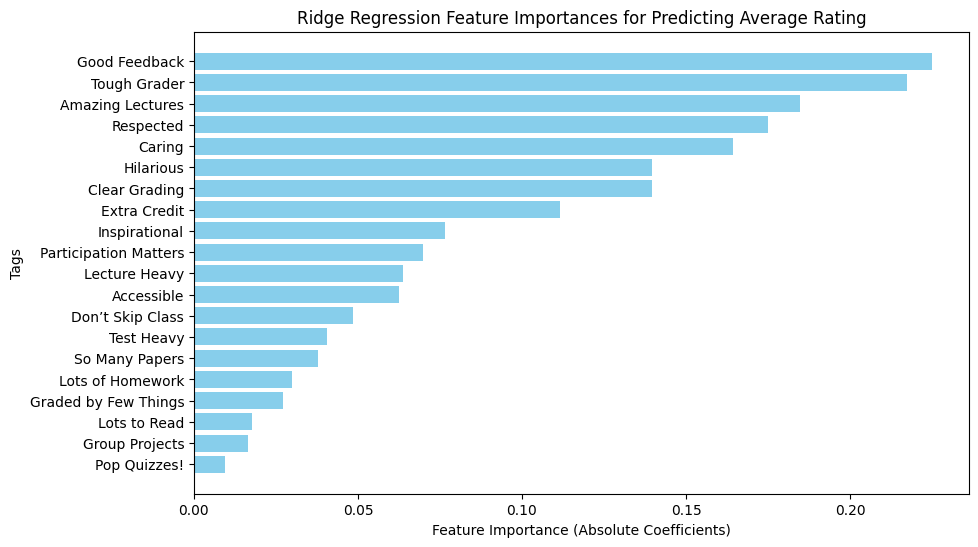

In [9]:
# Train the Ridge model explicitly
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Extract coefficients (acts as feature importance in Ridge regression)
coefficients = ridge_model.coef_

# Map coefficients to feature names
importance_df = pd.DataFrame({
    'Feature': X_tags.columns,  # Use the feature names
    'Importance': np.abs(coefficients)  # Absolute value of coefficients
}).sort_values(by='Importance', ascending=False)

# Display the most important features
print("Top features:")
print(importance_df.head())

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance (Absolute Coefficients)')
plt.ylabel('Tags')
plt.title('Ridge Regression Feature Importances for Predicting Average Rating')
plt.gca().invert_yaxis()  # Best predictors on top
plt.show()
